<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/LAB7_CLASS_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일 읽기
trash = pd.read_excel('/content/주민+1인당+생활폐기물(쓰레기)+배출량_20241111094307.xlsx')
trash

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시점,자치구별(1),"주민 1인당 생활폐기물(쓰레기) 배출량 (㎏/인, 일)",생활폐기물 배출량 (톤/일),주민수 (명)
0,2012.0,계,0.88,9189.3,10442426
1,NaN,종로구,2.23,386.6,173148
2,NaN,중구,3.93,553.4,140807
3,NaN,용산구,0.89,227.9,255294
4,NaN,성동구,0.87,267.6,306868
...,...,...,...,...,...
281,NaN,관악구,0.88,442.7,501226
282,NaN,서초구,1.21,493.9,408451
283,NaN,강남구,1.35,721.4,534103
284,NaN,송파구,1.24,826.9,664514


# 전처리

In [3]:
# 컬럼이름 바꾸기
trash.columns = ['년도', '자치구', '1인당배출량', '쓰레기배출량', '주민수']

In [4]:
trash

,년도,자치구,1인당배출량,쓰레기배출량,주민수
0,2012.0,계,0.88,9189.3,10442426
1,NaN,종로구,2.23,386.6,173148
2,NaN,중구,3.93,553.4,140807
3,NaN,용산구,0.89,227.9,255294
4,NaN,성동구,0.87,267.6,306868
...,...,...,...,...,...
281,NaN,관악구,0.88,442.7,501226
282,NaN,서초구,1.21,493.9,408451
283,NaN,강남구,1.35,721.4,534103
284,NaN,송파구,1.24,826.9,664514


In [5]:
# 년도 앞에서 채우기
trash.년도.fillna(method='ffill', inplace=True)
trash

<ipython-input-5-b583c1450b7b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trash.년도.fillna(method='ffill', inplace=True)
<ipython-input-5-b583c1450b7b>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trash.년도.fillna(method='ffill', inplace=True)


,년도,자치구,1인당배출량,쓰레기배출량,주민수
0,2012.0,계,0.88,9189.3,10442426
1,2012.0,종로구,2.23,386.6,173148
2,2012.0,중구,3.93,553.4,140807
3,2012.0,용산구,0.89,227.9,255294
4,2012.0,성동구,0.87,267.6,306868
...,...,...,...,...,...
281,2022.0,관악구,0.88,442.7,501226
282,2022.0,서초구,1.21,493.9,408451
283,2022.0,강남구,1.35,721.4,534103
284,2022.0,송파구,1.24,826.9,664514


In [6]:
# 자치구에서 계 삭제하기
trash = trash[trash['자치구']!='계']
trash

,년도,자치구,1인당배출량,쓰레기배출량,주민수
1,2012.0,종로구,2.23,386.6,173148
2,2012.0,중구,3.93,553.4,140807
3,2012.0,용산구,0.89,227.9,255294
4,2012.0,성동구,0.87,267.6,306868
5,2012.0,광진구,0.96,368.5,384269
...,...,...,...,...,...
281,2022.0,관악구,0.88,442.7,501226
282,2022.0,서초구,1.21,493.9,408451
283,2022.0,강남구,1.35,721.4,534103
284,2022.0,송파구,1.24,826.9,664514


In [7]:
# 년도를 정수로 변환
trash['년도'] = trash['년도'].astype(int)
trash

<ipython-input-7-f25356fc6ca2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trash['년도'] = trash['년도'].astype(int)


,년도,자치구,1인당배출량,쓰레기배출량,주민수
1,2012,종로구,2.23,386.6,173148
2,2012,중구,3.93,553.4,140807
3,2012,용산구,0.89,227.9,255294
4,2012,성동구,0.87,267.6,306868
5,2012,광진구,0.96,368.5,384269
...,...,...,...,...,...
281,2022,관악구,0.88,442.7,501226
282,2022,서초구,1.21,493.9,408451
283,2022,강남구,1.35,721.4,534103
284,2022,송파구,1.24,826.9,664514


# 데이터 검사

In [8]:
# 데이터 사이즈
trash.shape #25개 자치구, 11년간

(275, 5)

In [9]:
# 데이터 타입
trash.dtypes # 자치구 인코딩

,0
년도,int64
자치구,object
1인당배출량,float64
쓰레기배출량,float64
주민수,int64


In [10]:
# 널값 체크
trash.isnull().sum()

,0
년도,0
자치구,0
1인당배출량,0
쓰레기배출량,0
주민수,0


# 사전분석

In [11]:
# 일변량 - 기초통계량
trash.describe()

,년도,1인당배출량,쓰레기배출량,주민수
count,275.000000,275.000000,275.000000,275.000000
mean,2017.000000,1.050109,386.932727,404368.080000
std,3.168043,0.595967,178.578501,126961.660889
min,2012.000000,0.450000,180.200000,130785.000000
25%,2014.000000,0.750000,288.100000,323619.000000
50%,2017.000000,0.870000,345.500000,408493.000000
75%,2020.000000,1.110000,423.900000,486506.500000
max,2022.000000,3.930000,2059.700000,682741.000000


In [1]:
# # 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [12]:
# 런타임 재시작후 폰트설정
plt.rc('font', family='NanumBarunGothic')

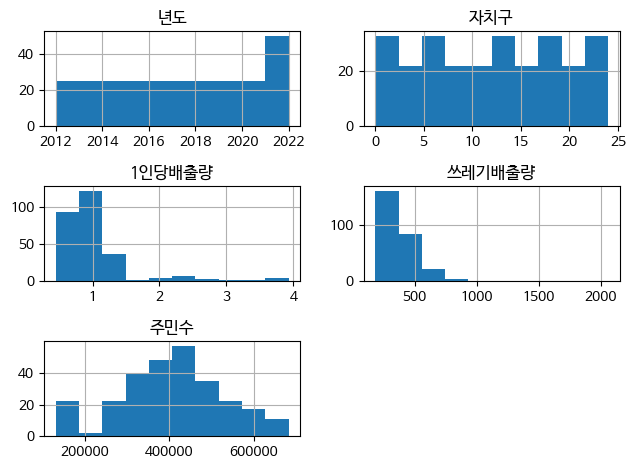

In [20]:
# 히스토그램
trash.hist()
plt.tight_layout()
plt.show()

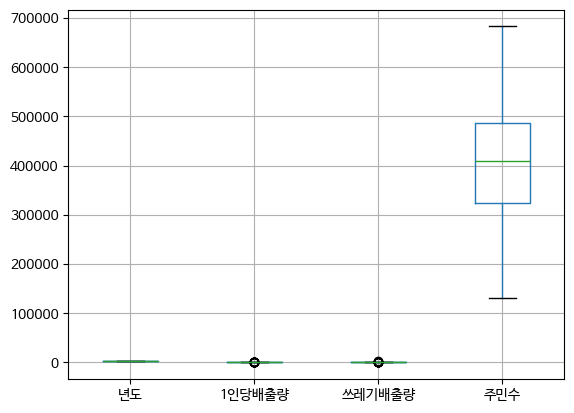

In [14]:
# 박스플랏
trash.boxplot() # 주민수 스케일링 필요
plt.show()

In [21]:
# 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
trash['자치구'] = encoder.fit_transform(trash['자치구'])
trash.head()

<ipython-input-21-f467798291a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trash['자치구'] = encoder.fit_transform(trash['자치구'])


,년도,자치구,1인당배출량,쓰레기배출량,주민수
1,2012,22,2.23,386.6,173148
2,2012,23,3.93,553.4,140807
3,2012,20,0.89,227.9,255294
4,2012,15,0.87,267.6,306868
5,2012,5,0.96,368.5,384269


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


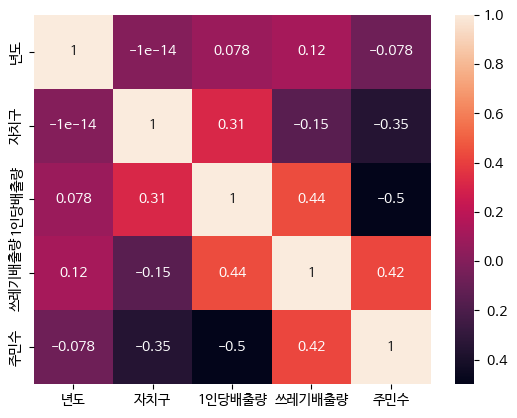

In [17]:
# 다변량 - 상관관계
sns.heatmap(trash.corr(), annot=True)

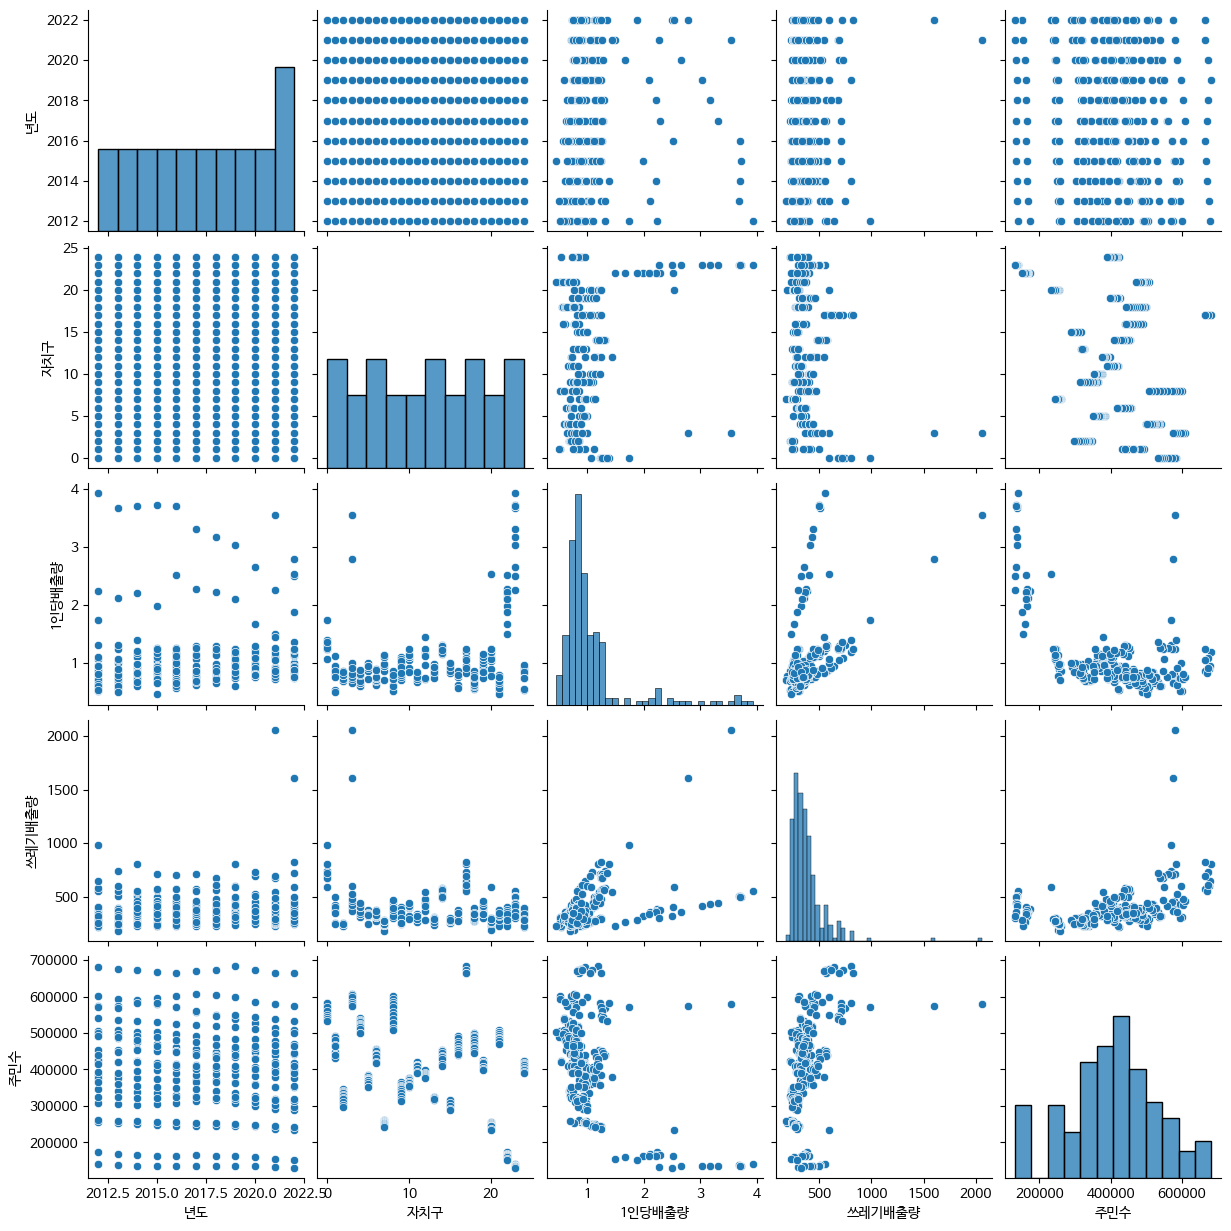

In [18]:
# 다변량 - 산점도
sns.pairplot(trash)

In [22]:
# 표준 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trash_scaled = scaler.fit_transform(trash)
trash_scaled

array([[-1.58113883e+00,  1.38675049e+00,  1.98340090e+00,
        -1.86659584e-03, -1.82450063e+00],
       [-1.58113883e+00,  1.52542554e+00,  4.84110707e+00,
         9.33879317e-01, -2.07969548e+00],
       [-1.58113883e+00,  1.10940039e+00, -2.69143963e-01,
        -8.92171610e-01, -1.17630680e+00],
       ...,
       [ 1.58113883e+00, -1.66410059e+00,  5.04117706e-01,
         1.87635722e+00,  1.02370626e+00],
       [ 1.58113883e+00,  6.93375245e-01,  3.19207307e-01,
         2.46821090e+00,  2.05274730e+00],
       [ 1.58113883e+00, -1.52542554e+00, -5.04484471e-01,
        -2.30193087e-01,  4.70832733e-01]])

In [23]:
# x and y split
y = trash.쓰레기배출량
x = trash.drop('쓰레기배출량', axis=1)

In [24]:
# train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# 회귀분석
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:
# 모델 확인
print('기울기: ', model.coef_)
print('Y 절편: ', model.intercept_)

기울기:  [ 7.16458146e+00 -3.60772083e+00  2.66951304e+02  1.20168906e-03]
Y 절편:  -14785.340222106419


In [31]:
# 평가
model.score(x_test, y_test)

0.6881931731251146

In [33]:
# 평가
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.6881931731251146